In [38]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import config

engine = create_engine(f"postgresql+psycopg2://{config.user}:{config.password}@{config.host}:{config.port}/{config.dbname}")
Base = automap_base()
Base.prepare(engine, schema='market', reflect=True)

youtube = Base.classes.youtube

session = Session(engine)

youtube_result = session.query(youtube)

yt_df = pd.read_sql(youtube_result.statement, con=engine.connect())

C:\Users\jonna\AppData\Local\Temp\ipykernel_3560\2926468971.py:9: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='market', reflect=True)


In [39]:
yt_df["index"] = yt_df.index

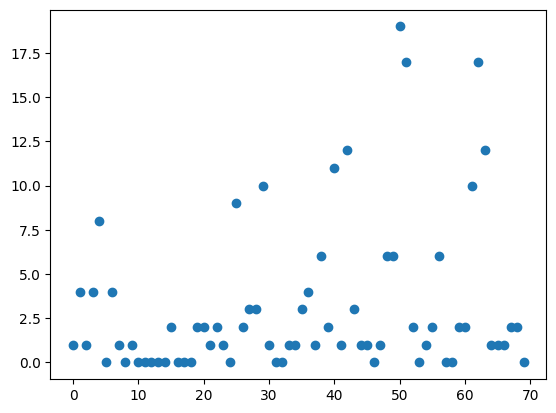

In [40]:
X = yt_df['index']
y = yt_df['likes']

import matplotlib.pyplot as plt
plt.scatter(X,y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8)

In [42]:
import numpy as np
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [43]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [44]:
# y = mX + c
c = lin.intercept_
m = lin.coef_

In [45]:
y_pred_train = m*X_train + c

y_pred_train = lin.predict(X_train)

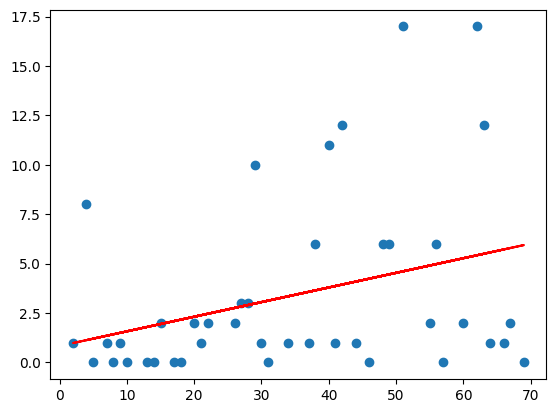

In [46]:
X = yt_df['index']
y = yt_df['likes']

plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train, color = 'red')

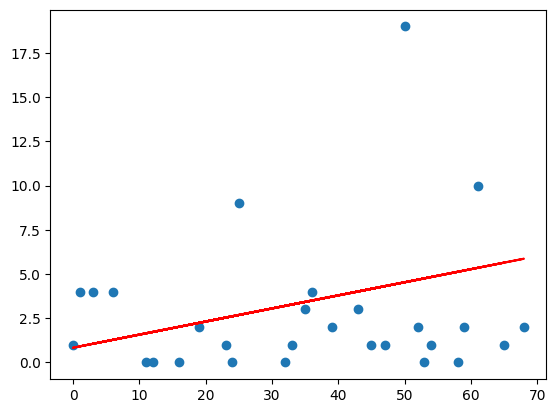

In [47]:
y_pred_test = lin.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test, color = 'red')

In [ ]:
import pandas as pd